In [45]:
import scipy.io
import numpy as np
import pylab as pl

In [30]:
mat = scipy.io.loadmat('data/binaryalphadigs.mat')
data_digits = mat['dat'][:10,]
data_alpha = mat['dat'][10:,]
print("data_digits shape = {}".format(data_digits.shape))
print("data_alpha shape = {}".format(data_alpha.shape))

data_digits shape = (10, 39)
data_alpha shape = (26, 39)


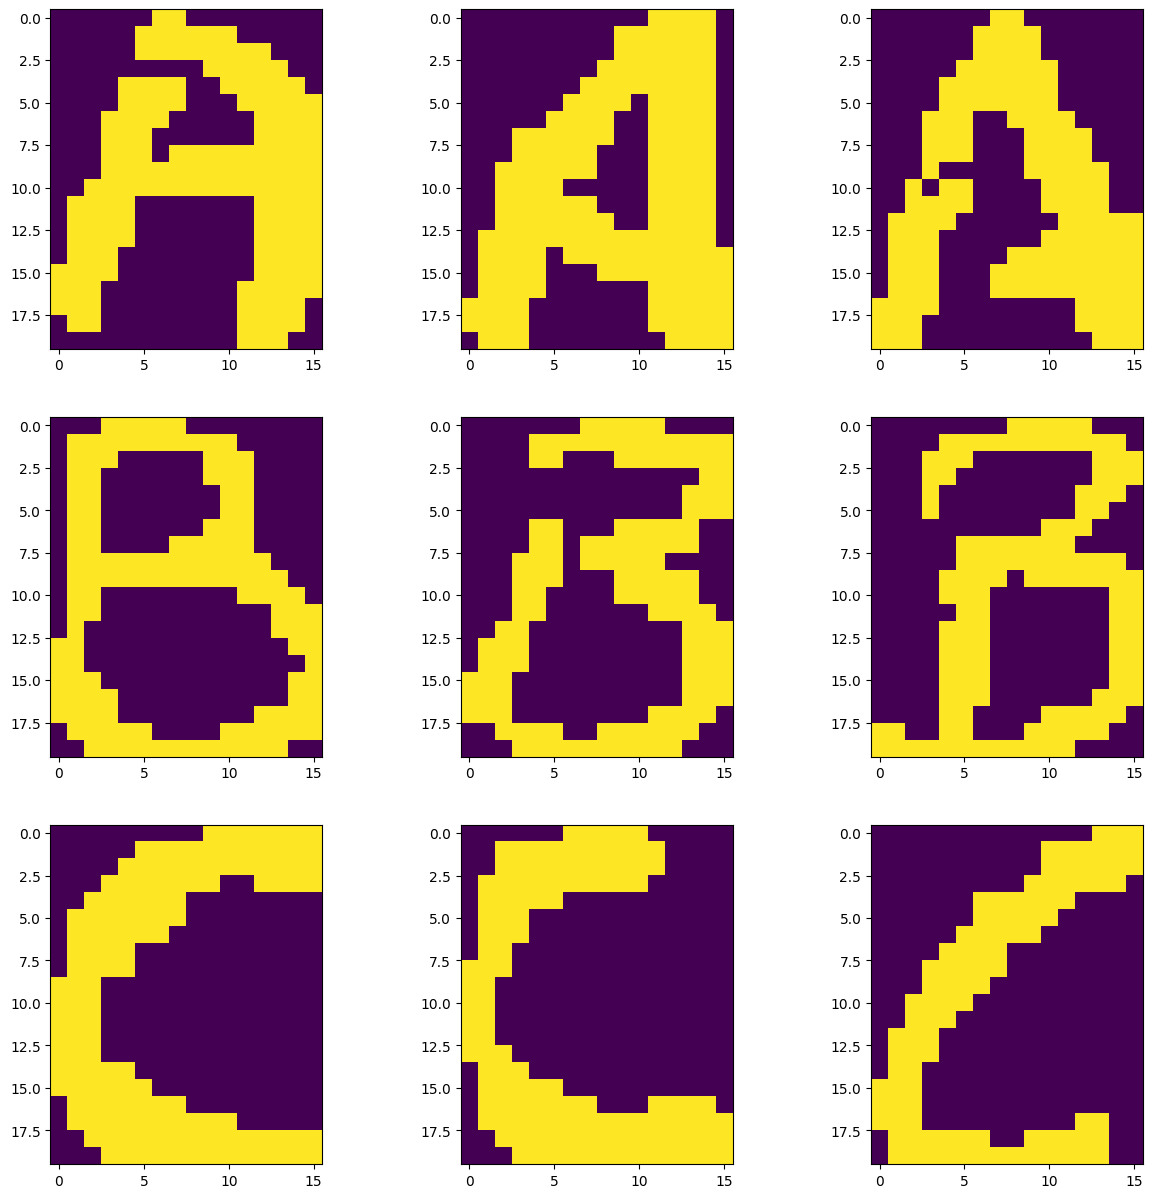

In [39]:
fig, ax = pl.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    for j in range(3):
        ax[i, j].imshow(data_alpha[i, j])


In [41]:
data_alpha[[0,1],].shape

(2, 39)

In [42]:
data_alpha.shape

(26, 39)

In [64]:
def lire_alpha_digits(data, list_index):
    m, n = data.shape
    p, q = data[0, 0].shape
    matrix = np.zeros((len(list_index)*n, p*q))
    for i, index in enumerate(list_index):
        for j in range(n):
            matrix[i*n + j] = data[index, j].reshape(p*q)
    return matrix

In [65]:
data_alpha_reshaped = lire_alpha_digits(data_alpha, [0])
data_digits_reshaped = lire_alpha_digits(data_digits, [0])

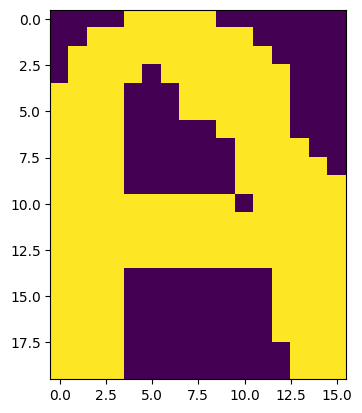

In [66]:
pl.imshow(data_alpha_reshaped[-1,:].reshape(20,16))

In [67]:
def init_RBM(p, q):
    a = np.zeros(p)
    b = np.zeros(q)
    W = np.random.normal(0, 0.1, size=(p, q))
    return W, a, b

In [68]:
init_RBM(3, 4)

(array([[-0.05425549,  0.03922394, -0.03808629, -0.19904159],
        [ 0.04182063, -0.03622977,  0.08250602, -0.17198712],
        [ 0.00432328, -0.10315619, -0.16686409, -0.05711059]]),
 array([0., 0., 0.]),
 array([0., 0., 0., 0.]))

In [92]:
def entree_sortie_RBM(W, a, b, H):
    A = np.tile(a, (H.shape[0], 1))
    Z = np.transpose(W @ H.T) + a
    return np.exp(Z)/(1 + np.exp(Z))

def sortie_entree_RBM(W, a, b, V):
    B = np.tile(b, (V.shape[0], 1))
    Z = np.transpose(W.T @ V.T) + B
    return np.exp(Z)/(1 + np.exp(Z))

In [83]:
def split_in_batches(indexes, batch):
    Batches = []
    N = len(indexes) // batch
    for i in range(N):
        Batches.append(indexes[i*batch:i*batch+batch])
    Batches.append(indexes[N*batch:len(indexes)])
    return Batches

In [84]:
split_in_batches(np.arange(39), 5)

[array([0, 1, 2, 3, 4]),
 array([5, 6, 7, 8, 9]),
 array([10, 11, 12, 13, 14]),
 array([15, 16, 17, 18, 19]),
 array([20, 21, 22, 23, 24]),
 array([25, 26, 27, 28, 29]),
 array([30, 31, 32, 33, 34]),
 array([35, 36, 37, 38])]

In [106]:
def train_RBM(W_init, a_init, b_init, X, niter, step, batch, verbose=True):
    assert(X.shape[1] == W_init.shape[0])
    W, a, b = W_init.copy(), a_init.copy(), b_init.copy()
    V = X.copy()
    batches_index = split_in_batches(np.arange(X.shape[0]), batch)
    for epoch in range(niter):
        loss = 0
        for batch in batches_index:
            X_batch = X[batch]
            Ph = sortie_entree_RBM(W, a, b, X_batch)
            H = np.round(Ph)
            Pv = entree_sortie_RBM(W, a, b, H)
            V = np.round(Pv)
            Mh = sortie_entree_RBM(W, a, b, V)
            loss += np.sum((V - X_batch)**2)

            # Compute the gradients
            grad_W = X_batch.T @ Ph - V.T @ Mh
            grad_a = np.sum(X_batch - V, axis=0)
            grad_b = np.sum(Ph - Mh, axis=0)

            # Update the parameters
            W += step*grad_W
            a += step*grad_a
            b += step*grad_b
        loss /= X.shape[0]
        if verbose:
            print("Epoch {}/{} : MSE = {}".format(epoch + 1, niter, loss))
    return W, a, b

In [133]:
W, a, b = init_RBM(320, 100)
W_star, a_star, b_star = train_RBM(W, a, b, data_alpha_reshaped, 60, 0.01, 10)

Epoch 1/60 : MSE = 122.41025641025641
Epoch 2/60 : MSE = 106.71794871794872
Epoch 3/60 : MSE = 101.84615384615384
Epoch 4/60 : MSE = 94.46153846153847
Epoch 5/60 : MSE = 86.0
Epoch 6/60 : MSE = 76.1025641025641
Epoch 7/60 : MSE = 71.07692307692308
Epoch 8/60 : MSE = 69.02564102564102
Epoch 9/60 : MSE = 64.35897435897436
Epoch 10/60 : MSE = 55.53846153846154
Epoch 11/60 : MSE = 55.1025641025641
Epoch 12/60 : MSE = 50.35897435897436
Epoch 13/60 : MSE = 49.333333333333336
Epoch 14/60 : MSE = 45.56410256410256
Epoch 15/60 : MSE = 42.64102564102564
Epoch 16/60 : MSE = 37.84615384615385
Epoch 17/60 : MSE = 37.87179487179487
Epoch 18/60 : MSE = 36.1025641025641
Epoch 19/60 : MSE = 34.56410256410256
Epoch 20/60 : MSE = 32.17948717948718
Epoch 21/60 : MSE = 29.615384615384617
Epoch 22/60 : MSE = 29.615384615384617
Epoch 23/60 : MSE = 25.564102564102566
Epoch 24/60 : MSE = 25.923076923076923
Epoch 25/60 : MSE = 23.205128205128204
Epoch 26/60 : MSE = 21.871794871794872
Epoch 27/60 : MSE = 22.7179

In [109]:
def generer_image_RBM(W, a, b, n_images, n_iter):
    X = np.random.normal(0, 0.1, size=(n_images, W.shape[0]))
    for _ in range(n_iter):
        Ph = sortie_entree_RBM(W, a, b, X)
        H = np.round(Ph)
        Pv = entree_sortie_RBM(W, a, b, H)
        X = np.round(Pv)
    return X

In [134]:
gen = generer_image_RBM(W_star, a_star, b_star, 9, 300)

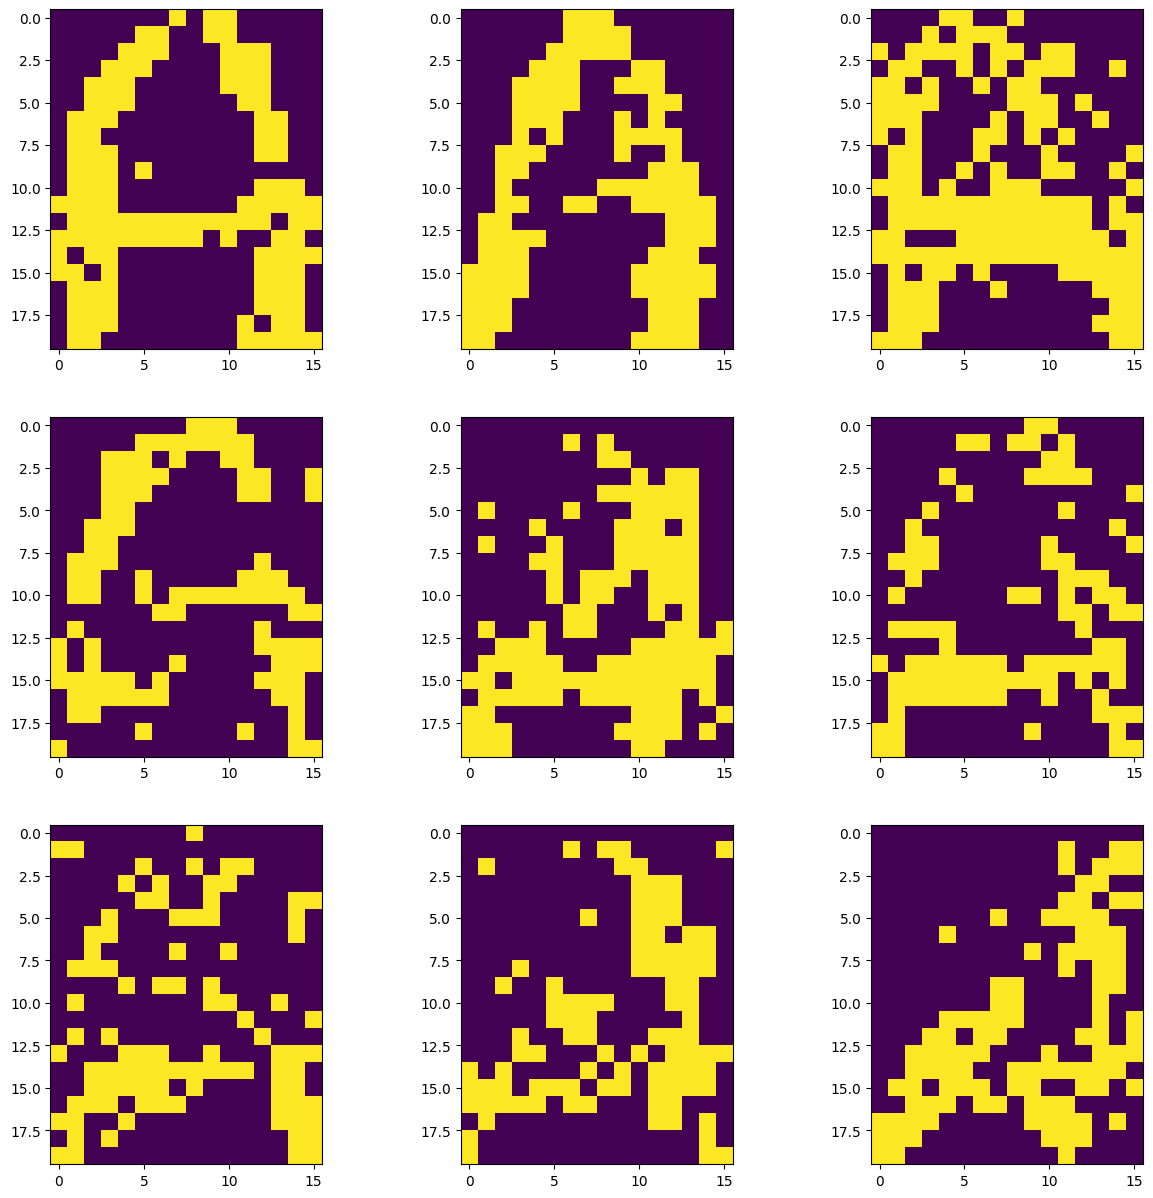

In [135]:
fig, ax = pl.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        ax[i, j].imshow(gen[3*i + j,:].reshape(20,16))